# 3 Preprocessing & Modeling: Breast Cancer Gene Expressions <a id='3_modeling'></a>

## 3.1 Contents <a id='3.1_contents'></a>

* [3 Preprocessing & Modeling](#3_modeling)
    * [3.1 Contents](#2.1_contents)
    * [3.2 Introduction](#3.2_intro)
    * [3.3 Imports](#3.3_imports)
    * [3.4 Loading the Data](#3.4_loading)
    * [3.5 PCA](#3.5_pca)

## 3.2 Introduction <a id='3.2_intro'></a>

## 3.3 Imports  <a id='3.3_imports'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyarrow.parquet as pq
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
import statsmodels.api as sm
from scipy import stats
import missingno as msno
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## 3.4 Loading the Data <a id='3.4_loading'></a>

In [3]:
# importing using parquet to preserve data types

num_data=pd.read_parquet(r'C:\Users\leann\OneDrive\Desktop\SPRINGBOARD\capstone 2\num_data.parquet', engine='pyarrow')

In [4]:
num_data.head()

,age_at_diagnosis,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,tumor_size,type_of_breast_surgery_BREAST CONSERVING,type_of_breast_surgery_MASTECTOMY,type_of_breast_surgery_nan,cancer_type_Breast Cancer,cancer_type_Breast Sarcoma,cancer_type_detailed_Breast,cancer_type_detailed_Breast Invasive Ductal Carcinoma,cancer_type_detailed_Breast Invasive Lobular Carcinoma,cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma,cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma,cancer_type_detailed_Metaplastic Breast Cancer,cancer_type_detailed_nan,cellularity_High,cellularity_Low,cellularity_Moderate,cellularity_nan,chemotherapy_0,chemotherapy_1,pam50_+_claudin-low_subtype_Basal,pam50_+_claudin-low_subtype_Her2,pam50_+_claudin-low_subtype_LumA,pam50_+_claudin-low_subtype_LumB,pam50_+_claudin-low_subtype_NC,pam50_+_claudin-low_subtype_Normal,pam50_+_claudin-low_subtype_claudin-low,cohort_1,cohort_2,cohort_3,cohort_4,cohort_5,er_status_measured_by_ihc_Negative,er_status_measured_by_ihc_Positive,er_status_measured_by_ihc_nan,er_status_Negative,er_status_Positive,neoplasm_histologic_grade_1.0,neoplasm_histologic_grade_2.0,neoplasm_histologic_grade_3.0,neoplasm_histologic_grade_nan,her2_status_measured_by_snp6_GAIN,her2_status_measured_by_snp6_LOSS,her2_status_measured_by_snp6_NEUTRAL,her2_status_measured_by_snp6_UNDEF,her2_status_Negative,her2_status_Positive,tumor_other_histologic_subtype_Ductal/NST,tumor_other_histologic_subtype_Lobular,tumor_other_histologic_subtype_Medullary,tumor_other_histologic_subtype_Metaplastic,tumor_other_histologic_subtype_Mixed,tumor_other_histologic_subtype_Mucinous,tumor_other_histologic_subtype_Other,tumor_other_histologic_subtype_Tubular/ cribriform,tumor_other_histologic_subtype_nan,hormone_therapy_0,hormone_therapy_1,inferred_menopausal_state_Post,inferred_menopausal_state_Pre,primary_tumor_laterality_Left,primary_tumor_laterality_Right,primary_tumor_laterality_nan,oncotree_code_BREAST,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC,oncotree_code_nan,overall_survival_0,overall_survival_1,pr_status_Negative,pr_status_Positive,radio_therapy_0,radio_therapy_1,3-gene_classifier_subtype_ER+/HER2- High Prolif,3-gene_classifier_subtype_ER+/HER2- Low Prolif,3-gene_classifier_subtype_ER-/HER2-,3-gene_classifier_subtype_HER2+,3-gene_classifier_subtype_nan,tumor_stage_0.0,tumor_stage_1.0,tumor_stage_2.0,tumor_stage_3.0,tumor_stage_4.0,tumor_stage_nan,death_from_cancer_0,death_from_cancer_1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,ccne1,cdk2,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b,e2f1,e2f2,e2f3,e2f4,e2f5,e2f6,e2f7,e2f8,src,jak1,jak2,stat1,stat2,stat3,stat5a,stat5b,mdm2,tp53bp1,adam10,adam17,aph1a,aph1b,arrdc1,cir1,ctbp1,ctbp2,cul1,dll1,dll3,dll4,dtx1,dtx2,dtx3,dtx4,ep300,fbxw7,hdac1,hdac2,hes1,hes5,heyl,itch,jag1,jag2,kdm5a,lfng,maml1,maml2,maml3,ncor2,ncstn,notch1,notch2,notch3,nrarp,numb,numbl,psen1,psen2,psenen,rbpj,rbpjl,rfng,snw1,spen,hes2,hes4,hes7,hey1,hey2,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,acvrl1,akt1,akt1s1,akt2,apaf1,arl11,atr,aurka,bad,bcl2,bcl2l1,bmp10,bmp15,bmp2,bmp3,bmp4,bmp5,bmp6,bmp7,bmpr1a,bmpr1b,bmpr2,braf,casp10,casp3,casp6,casp7,casp8,casp9,chek1,csf1,csf1r,cxcl8,cxcr1,cxcr2,dab2,diras3,dlec1,dph1,egfr,eif4e,eif4ebp1,eif5a2,erbb2,erbb3,erbb4,fas,fgf1,fgfr1,folr1,folr2,folr3,foxo1,foxo3,gdf11,gdf2,gsk3b,hif1a,hla-g,hras,igf1,igf1r,inha,inhba,inhbc,itgav,itgb3,izumo1r,kdr,kit,kras,map2k1,map2k2,map2k3,map2k4,map2k5,map3k1,map3k3,map3k4,map3k5,mapk1,mapk12,mapk14,mapk3,mapk4,mapk6,mapk7,mapk8,mapk9,mdc1,mlst8,mmp1,mmp10,mmp11,mmp12,mmp13,mmp14,mmp15,mmp16,mmp17,mmp19,mmp2,mmp21,mmp23b,mmp24,mmp25,mmp26,mmp27,mmp28,mmp3,mmp7,mmp9,mtor,nfkb1,nfkb2,opcml,pdgfa,pdgfb,pdgfra,pdgfrb,pdpk1,peg3,pik3ca,pik3r1,pik3r2,plagl1,ptk2,rab25,rad51,raf1,rassf1,rheb,rictor,rps6,rps6ka1,rps6ka

In [5]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1903 entries, 0 to 7299
Columns: 754 entries, age_at_diagnosis to siah1_mut
dtypes: float64(492), int64(262)
memory usage: 11.0 MB


In [6]:
# checking data types
num_data.dtypes

age_at_diagnosis                 float64
lymph_nodes_examined_positive      int64
mutation_count                     int64
nottingham_prognostic_index      float64
overall_survival_months          float64
                                  ...   
hras_mut                           int64
prps2_mut                          int64
smarcb1_mut                        int64
stmn2_mut                          int64
siah1_mut                          int64
Length: 754, dtype: object

In [7]:
# confirming no missing data
num_data.isnull().values.any()

False

## 3.5 PCA <a id='3.5_pca'></a>

### How many features do I need to keep to avoid wide & short?

In [8]:
# to figure out how much of my data to keep, I ideally want 10 times as many rows as features so that it's not wide and short.
rows = num_data.shape[0]
ideal_features = rows/10
print('Ideal number of features:',ideal_features)

Ideal number of features: 190.3


I will aim to have 190 features or less, if possible. I will keep this in mind during the next step. 

### Prepare data for PCA

In [9]:
# I need to drop the extra death_from_cancer_1 column, and rename death_from_cancer_0 to just outcome
#MAKING A CHANGE : 0 = Survived or died of other causes, 1 = Died of Disease

num_data = num_data.rename(columns={"death_from_cancer_0":"outcome"})
num_data = num_data.drop("death_from_cancer_1",axis=1)

In [10]:
#move outcomes to the first column
first_column= num_data.pop('outcome')
num_data.insert(0, 'outcome', first_column)

In [11]:
num_data.head()

,outcome,age_at_diagnosis,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,tumor_size,type_of_breast_surgery_BREAST CONSERVING,type_of_breast_surgery_MASTECTOMY,type_of_breast_surgery_nan,cancer_type_Breast Cancer,cancer_type_Breast Sarcoma,cancer_type_detailed_Breast,cancer_type_detailed_Breast Invasive Ductal Carcinoma,cancer_type_detailed_Breast Invasive Lobular Carcinoma,cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma,cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma,cancer_type_detailed_Metaplastic Breast Cancer,cancer_type_detailed_nan,cellularity_High,cellularity_Low,cellularity_Moderate,cellularity_nan,chemotherapy_0,chemotherapy_1,pam50_+_claudin-low_subtype_Basal,pam50_+_claudin-low_subtype_Her2,pam50_+_claudin-low_subtype_LumA,pam50_+_claudin-low_subtype_LumB,pam50_+_claudin-low_subtype_NC,pam50_+_claudin-low_subtype_Normal,pam50_+_claudin-low_subtype_claudin-low,cohort_1,cohort_2,cohort_3,cohort_4,cohort_5,er_status_measured_by_ihc_Negative,er_status_measured_by_ihc_Positive,er_status_measured_by_ihc_nan,er_status_Negative,er_status_Positive,neoplasm_histologic_grade_1.0,neoplasm_histologic_grade_2.0,neoplasm_histologic_grade_3.0,neoplasm_histologic_grade_nan,her2_status_measured_by_snp6_GAIN,her2_status_measured_by_snp6_LOSS,her2_status_measured_by_snp6_NEUTRAL,her2_status_measured_by_snp6_UNDEF,her2_status_Negative,her2_status_Positive,tumor_other_histologic_subtype_Ductal/NST,tumor_other_histologic_subtype_Lobular,tumor_other_histologic_subtype_Medullary,tumor_other_histologic_subtype_Metaplastic,tumor_other_histologic_subtype_Mixed,tumor_other_histologic_subtype_Mucinous,tumor_other_histologic_subtype_Other,tumor_other_histologic_subtype_Tubular/ cribriform,tumor_other_histologic_subtype_nan,hormone_therapy_0,hormone_therapy_1,inferred_menopausal_state_Post,inferred_menopausal_state_Pre,primary_tumor_laterality_Left,primary_tumor_laterality_Right,primary_tumor_laterality_nan,oncotree_code_BREAST,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC,oncotree_code_nan,overall_survival_0,overall_survival_1,pr_status_Negative,pr_status_Positive,radio_therapy_0,radio_therapy_1,3-gene_classifier_subtype_ER+/HER2- High Prolif,3-gene_classifier_subtype_ER+/HER2- Low Prolif,3-gene_classifier_subtype_ER-/HER2-,3-gene_classifier_subtype_HER2+,3-gene_classifier_subtype_nan,tumor_stage_0.0,tumor_stage_1.0,tumor_stage_2.0,tumor_stage_3.0,tumor_stage_4.0,tumor_stage_nan,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,ccne1,cdk2,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b,e2f1,e2f2,e2f3,e2f4,e2f5,e2f6,e2f7,e2f8,src,jak1,jak2,stat1,stat2,stat3,stat5a,stat5b,mdm2,tp53bp1,adam10,adam17,aph1a,aph1b,arrdc1,cir1,ctbp1,ctbp2,cul1,dll1,dll3,dll4,dtx1,dtx2,dtx3,dtx4,ep300,fbxw7,hdac1,hdac2,hes1,hes5,heyl,itch,jag1,jag2,kdm5a,lfng,maml1,maml2,maml3,ncor2,ncstn,notch1,notch2,notch3,nrarp,numb,numbl,psen1,psen2,psenen,rbpj,rbpjl,rfng,snw1,spen,hes2,hes4,hes7,hey1,hey2,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,acvrl1,akt1,akt1s1,akt2,apaf1,arl11,atr,aurka,bad,bcl2,bcl2l1,bmp10,bmp15,bmp2,bmp3,bmp4,bmp5,bmp6,bmp7,bmpr1a,bmpr1b,bmpr2,braf,casp10,casp3,casp6,casp7,casp8,casp9,chek1,csf1,csf1r,cxcl8,cxcr1,cxcr2,dab2,diras3,dlec1,dph1,egfr,eif4e,eif4ebp1,eif5a2,erbb2,erbb3,erbb4,fas,fgf1,fgfr1,folr1,folr2,folr3,foxo1,foxo3,gdf11,gdf2,gsk3b,hif1a,hla-g,hras,igf1,igf1r,inha,inhba,inhbc,itgav,itgb3,izumo1r,kdr,kit,kras,map2k1,map2k2,map2k3,map2k4,map2k5,map3k1,map3k3,map3k4,map3k5,mapk1,mapk12,mapk14,mapk3,mapk4,mapk6,mapk7,mapk8,mapk9,mdc1,mlst8,mmp1,mmp10,mmp11,mmp12,mmp13,mmp14,mmp15,mmp16,mmp17,mmp19,mmp2,mmp21,mmp23b,mmp24,mmp25,mmp26,mmp27,mmp28,mmp3,mmp7,mmp9,mtor,nfkb1,nfkb2,opcml,pdgfa,pdgfb,pdgfra,pdgfrb,pdpk1,peg3,pik3ca,pik3r1,pik3r2,plagl1,ptk2,rab25,rad51,raf1,rassf1,rheb,rictor,rps6,rps6ka1,rps6ka2,rps6kb1,rps6kb2,rptor,slc19a1,

### Train/test split and scaling

In [12]:
# first separate out my 'outcome' column
X = num_data.drop('outcome', axis=1)
y = num_data['outcome']

In [13]:
# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [14]:
# scale the data - don't do fit on test data so that we don't influence it with training data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(X_train)
test_data_scaled = scaler.transform(X_test)

In [15]:
#verify the scaling:

# call the mean - MAKE SURE THESE ARE CLOSE ENOUGH TO ZERO
print('train data mean: ',train_data_scaled.mean())
print('test data mean: ',test_data_scaled.mean())

train data mean:  -5.466219549766267e-18
test data mean:  -0.0034290398751305067


In [16]:
# call the standard deviation
print('train data standard deviation: ',train_data_scaled.std())
print('test data standard deviation: ',test_data_scaled.std())

train data standard deviation:  0.999334885194126
test data standard deviation:  0.9801387365815354


# ask aj about standard deviation here - is it close enough to 1? I read that if not normally distributed, might not be exactly 1

### Apply PCA

First, let's do it for 190 components, which means that we are following the rule of thumb of 10x as many rows as features. 

In [17]:
# fit the training data
pca190 = PCA(n_components=190)
train_data_pca190 = pca190.fit(train_data_scaled)

Now let's do another PCA where we want it to account for 90% of the variance.

In [18]:
pca360 = PCA(n_components=0.90)
train_data_pca360 = pca360.fit(train_data_scaled)

In [19]:
print("Number of components when n_components set to 0.90: ", pca360.n_components_)

Number of components when n_components set to 0.90:  360


I'm now going back and changing the name of this variabe to be consistent, now that I know the number of components

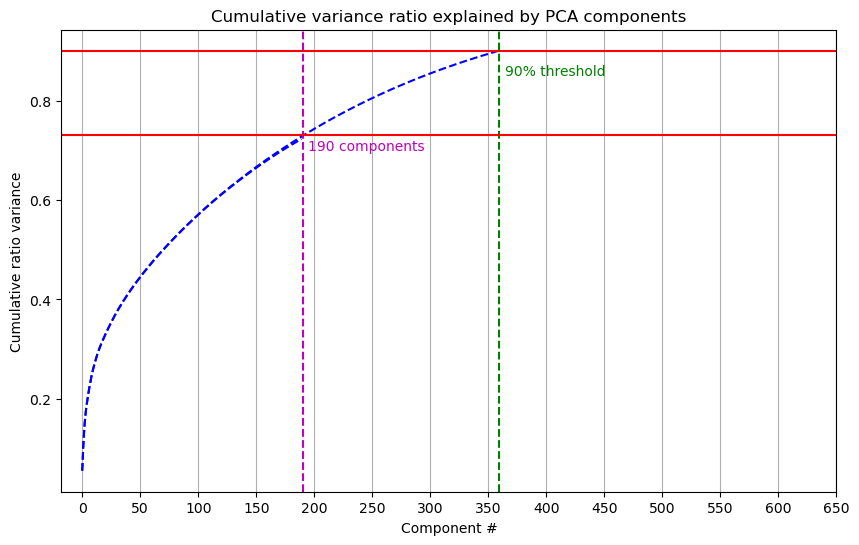

In [20]:
# plot the cumulative variance ratio explained by pca components. 

plt.subplots(figsize=(10, 6))
plt.plot(train_data_pca190.explained_variance_ratio_.cumsum(), linestyle='--', color='b')
plt.plot(train_data_pca360.explained_variance_ratio_.cumsum(), linestyle='--', color='b')
plt.xlabel('Component #')
plt.xticks(np.arange(0, 700, step=50))
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.axvline(x=np.argmax(train_data_pca360.explained_variance_ratio_.cumsum() >= 0.90), color='g', linestyle='--')
plt.text(np.argmax(train_data_pca360.explained_variance_ratio_.cumsum() >= 0.9) + 5, 0.85, '90% threshold', color='green')

# Add threshold line for 190 components
plt.axvline(x=190, color='m', linestyle='--')
plt.text(190 + 5, 0.7, '190 components', color='m')

plt.axhline(y=0.73, color='r', linestyle='-')

#plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.grid(axis='x')
plt.show;

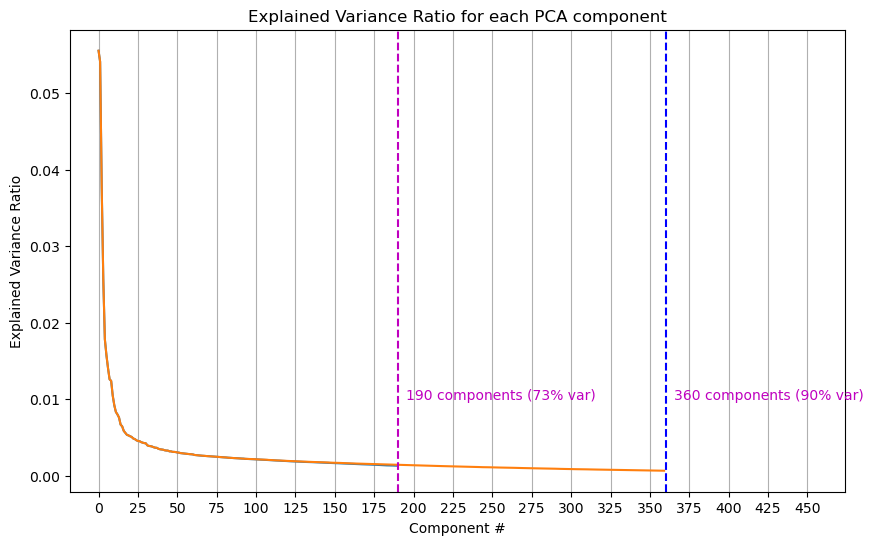

In [21]:
plt.subplots(figsize=(10, 6))
plt.plot(train_data_pca190.explained_variance_ratio_)
plt.plot(train_data_pca360.explained_variance_ratio_)
plt.xlabel('Component #')
plt.grid(axis='x')
plt.xticks(np.arange(0, 474, step=25))
plt.xlim(right=474)
# Add threshold line for 190 components (73% variance)
plt.axvline(x=190, color='m', linestyle='--')
plt.text(190+5, 0.01, '190 components (73% var)', color='m')
# Add threshold line for 360 components (90% variance)
plt.axvline(x=360, color='b', linestyle='--')
plt.text(360+5, 0.01, '360 components (90% var)', color='m')


plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each PCA component')
plt.show()

<b>Summary so far</b>: 360 components has an explained variance ratio of 90%, and 190 components (which makes my data set good proportions) has an expalined variance ratio of 73% As you can see above, Each component accounts for a very small amount of variance in the data. 

### Transform the data

In [22]:
# 190 components
train_pca190_trans = pca190.transform(train_data_scaled)
test_pca190_trans = pca190.transform(test_data_scaled)

# 360 components
train_pca360_trans = pca360.transform(train_data_scaled)
test_pca360_trans = pca360.transform(test_data_scaled)

Let's look at a plot of the first 2 components: 

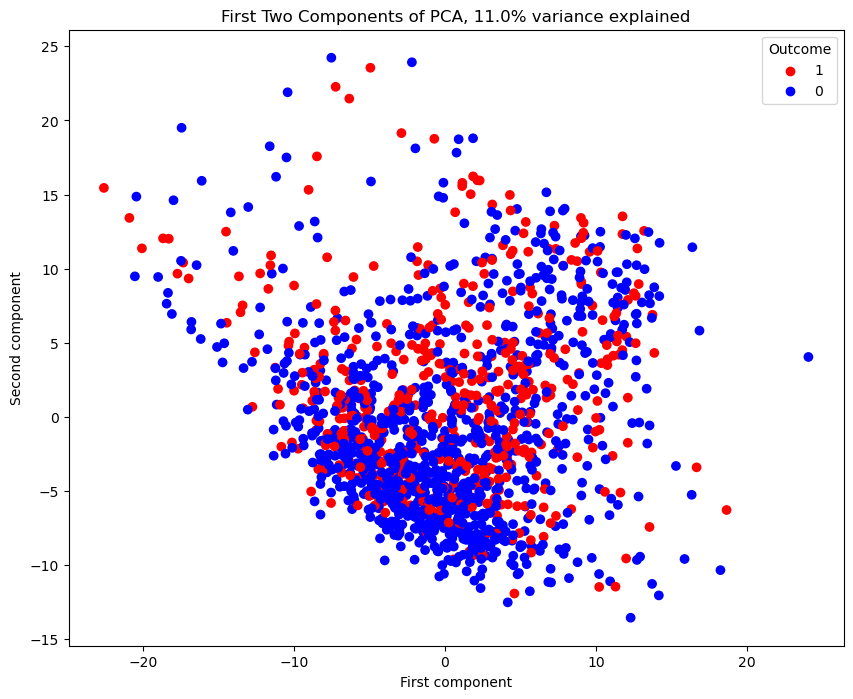

In [23]:
# Create a dictionary to map outcome values to colors
color_dict = {1: 'red', 0: 'blue'}

# Create a list of colors for each data point based on the outcome column from the training set
colors = [color_dict[val] for val in y_train]

# Get the coordinates of the first two principal components
x = train_pca190_trans[:, 0]
y = train_pca190_trans[:, 1]

# Calculate the cumulative explained variance
pc_var = 100 * pca190.explained_variance_ratio_.cumsum()[1]

plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y, c=colors)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'First Two Components of PCA, {pc_var:.1f}% variance explained')

# Add legend
handles = [plt.scatter([], [], c=color_dict[val], label=str(val)) for val in color_dict.keys()]
plt.legend(handles=handles, title='Outcome')

plt.show();

